<a href="https://colab.research.google.com/github/amelianrrzqa/Praktikum-Data-Mining/blob/main/SIC2_2109116121_Posttest_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Posttest Praktikum Sistem Informasi </h1>

NIM : **2109116121**

Nama : **Amelia Nur Rizqa**




## Business Understanding & Data Understanding

In [71]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
from google.colab import files
import io
import numpy as np

In [ ]:
df = pd.read_csv("ChurnBank.csv")
df

### Business Understanding

Churn adalah pemutusan jasa dari suatu bank yang dilakukan oleh nasabah,
dikarenakan nasabah merasa bank lain mampu memberikan layanan yang lebih baik.
Customer Churn harus ditangani dengan segera agar menghindari dampak besar untuk bank.  Semakin banyak nasabah melakukan churn, maka bank harus mengevaluasi layanan yang diberikan.



Proses data mining dengan metode naive bayes memanfaatkan data training
untuk menghasilkan probabilitas setiap kriteria untuk class yang berbeda,
sehingga nilai-nilai probabilitas dari kriteria tersebut dapat dioptimalkan
untuk kelayakan bank tetap berdasarkan proses klasifikasi yang dilakukan oleh metode naive bayes itu sendiri.



### Data Understanding

In [ ]:
# df1 isinya dataset dengan label target AttiredCustomer
df1 = df[(df['Attrition_Flag'] == 'Attrited Customer')]
df1

In [ ]:
# df2 dengan label bukan Attrited customer
#Memilih Data dengan Nilai Tidak Sama Dengan
df2 = df[~(df['Attrition_Flag'] == 'Attrited Customer')]
df2

In [ ]:
# df3 dengan tabel untuk usia dibawah 50 tahun
df3 = df[df["Customer_Age"] < 50 ]
df3

In [ ]:
# df4 untuk customer yang statusnya itu single
df4 = df[df['Marital_Status'] == 'Single']
df4

In [ ]:
# Tampilkan info dataset (df.info()) dan berikan penjelasannya dalam bentuk teks atau comment

In [ ]:
df.info

df.info() digunakan untuk menampilkan informasi detail tentang dataframe, seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya

In [ ]:
#@title Opsional (nilai plus)

# Tampilkan nilai rata-rata, min,max, dan standar deviasi  untuk setiap kolom bertipe angka
df_angka = pd.read_csv("ChurnBank.csv")


In [ ]:
#nilai minimal
df.min(axis = 0)

In [ ]:
#nilai maximal
df.max(axis = 0)

In [ ]:
#nilai rata-rata
df.mean(axis = 0)

Parameters :
axis : {indeks (0), kolom (1)}


#### Explore Data

##### Visualisasi Comparison

In [ ]:
# Buatlah visualisasi yang menampilkan berapa banyak yang attired customer dan tidak
sns.countplot(data=df,x="Attrition_Flag")

countplot digunakan untuk menjumlah data berdasarkan kategorinya

In [ ]:
# Buatlah visualisasi yang menampilkan berapa banyak Education level berdasarkan kategori-kategorinya 
# contoh Unknown berapa dsb
sns.histplot(data=df,y='Education_Level', kde=True)

divisualisasi ini kita bisa liat bahwa Uneducated dan Graduate memiliki nilai yang sama



In [ ]:
# Buatlah visualisasi yang menampilkan berapa banyak Education level berdasarkan gendernya
sns.countplot(data=df,y="Education_Level", hue="Gender")
# contoh M berapa F berapa

di visualisasi ini kita bisa liat bahwa gender Female yang paling tinggi dan paling tinggi itu berada di Graduate, sedangkan Male yang paling tinggi dibagian Uneducated

##### Visualisasi Distribution


<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

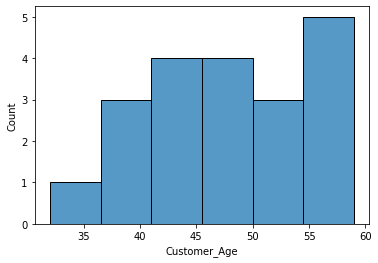

In [ ]:
# Buatlah historgram untuk umur customer dan credit card limit
sns.histplot(data=df,x="Customer_Age")

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

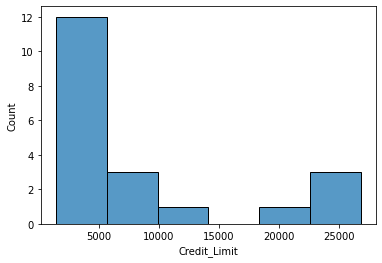

In [ ]:
sns.histplot(data=df,x="Credit_Limit")

<AxesSubplot:xlabel='Customer_Age'>

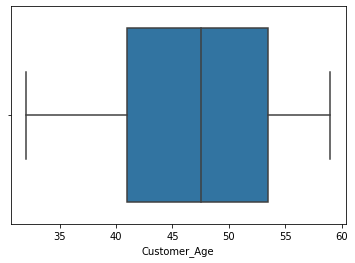

In [ ]:
# Buatlah boxplot untuk customer dan credit card limit
sns.boxplot(data=df,x="Customer_Age")

<AxesSubplot:xlabel='Credit_Limit'>

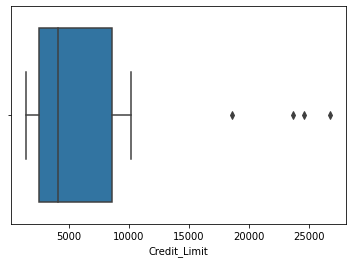

In [ ]:
sns.boxplot(data=df,x="Credit_Limit")

** Boxplot ** digunakan untuk menampilkan data numerik dengan 5 ukuran
** Histplot ** representasi grafik yang menunjukkan impresi visual dari distribusi sekelompok data.

##### Visualisasi Relationship




<AxesSubplot:xlabel='Customer_Age', ylabel='Credit_Limit'>

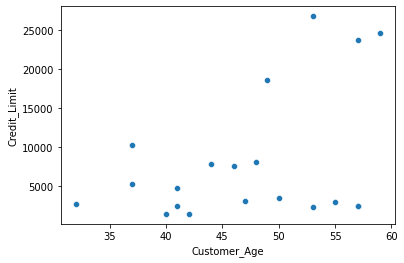

In [ ]:
# Buatlah scatterplot untuk umur customer dan credit card limit
sns.scatterplot(data=df,x="Customer_Age",y="Credit_Limit")

##### Visualisasi Composition




In [ ]:
import plotly.express as px

In [ ]:
# Buatlah pieplot untuk Income Category & Education Level
px.pie(df,names="Income_Category")

In [ ]:
px.pie(df,names="Education_Level")

### Opsional (Nilai Plus)

<AxesSubplot:xlabel='Credit_Limit', ylabel='Gender'>

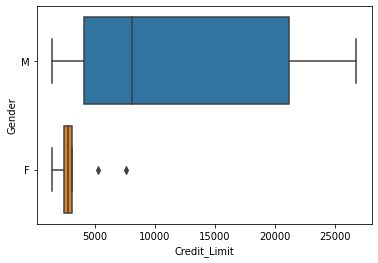

In [ ]:
# Buatlah visualisasi boxplot Credit Card Limit dengan Jenis Kelamin sebagai pemisahnya (color)
sns.boxplot(data=df,x="Credit_Limit",y="Gender")

<AxesSubplot:xlabel='Credit_Limit', ylabel='Attrition_Flag'>

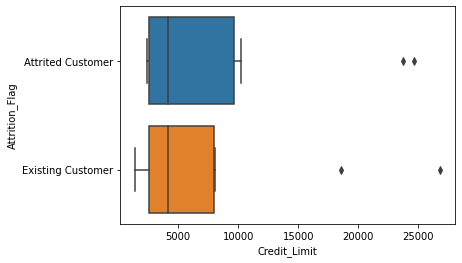

In [ ]:
# Buatlah visualisasi boxplot Credit Card Limit dengan Attrition Flag sebagai pemisahnya (color)
sns.boxplot(data=df,x="Credit_Limit", y="Attrition_Flag")

<AxesSubplot:xlabel='Customer_Age', ylabel='Attrition_Flag'>

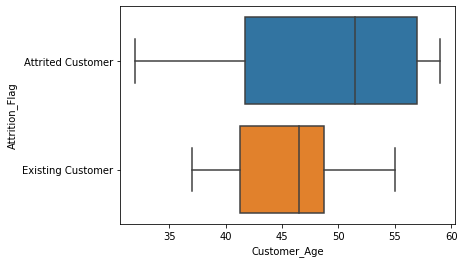

In [ ]:
# Buatlah visualisasi boxplot Age dengan Attrition Flag sebagai pemisahnya (color)
#Boxplot digunakan untuk menampilkan data numerik dengan 5 ukuran
sns.boxplot(x="Customer_Age", y="Attrition_Flag", data=df)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

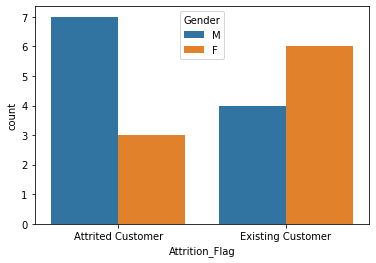

In [ ]:
# Buatlah visualisasi countplot  Attrition Flag dengan jenis kelamin sebagai pemisahnya (color)
#countplot digunakan untuk menjumlah data berdasarkan kategorinya
#hue adalah Nilai sumbu Z (untuk memperdetail visualisasi dari kolom lainnya)
sns.countplot(data=df,x="Attrition_Flag", hue="Gender")

<AxesSubplot:>

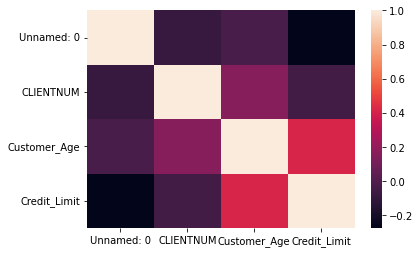

In [ ]:
# Buatlah visualisasi heatmap untuk Setiap variabel numerik yang ada
df_numerik=df.corr()
sns.heatmap(df_numerik)

## Algoritma Naive Bayes dan Preprocessing (pengenalan)

In [ ]:
# sebelum membuat algoritma pertama tama buatlah dataset baru dengan ketentuan
# mengambil dataset df
# Menghapus kolom Unnamed: 0, CLIENTNUM, Umur, dan Limit Kartu Kredit (initinya yang berupa primary key dan bukan tipe kategori)
# dataset dengan kolom yang sudah dihapus tadi kemudian disimpan di dataframe baru (df baru)


In [ ]:
df_baru = pd.read_csv("ChurnBank.csv")
df_baru.drop(columns=["Unnamed: 0", "CLIENTNUM", "Customer_Age", "Credit_Limit"], inplace=True)
#drop dapat beroperasi pada banyak item sekaligus df.drop(columns=['nama_kolom'])
#del beroperasi hanya satu per satu. (dalam drop dapat diatur nama beberapa kolom atau indeks) del df['nama_kolom']

In [ ]:
df_baru

In [ ]:
# Buatlah sebuah fungsi naive bayes dengan ketentuan
# Mengambil data dari dataframe yang telah diproses pada blok sebelumnya (diatas)
# Nama fungsinya adalah naive_bayes
# Mengambil 1 saja parameter yaitu sebuah list berisi kategori

# Outputnya berupa prediksi Attrited Customer atau Existing Customer
# Outputnya berupa tuple (_hasilnya, persentasenya berapa) contoh (Existing Customer, 0.004)

# Tidak boleh menggunakan library manapun selain pandas dan numpy



# contoh
# def naive_bayes(prediksi:list)-> tuple :
#   ........

# jadi nanti saat saya coba masukan data 
# naive_bayes(["F",	"Uneducated","Single", "Unknown	Blue"]) akan keluar tuple berupa ("Attired Customer", 0.002)


In [98]:
def naive_bayes(prediksi : list) -> tuple:
  count_ex = df_baru["Attrition_Flag"].value_counts()["Existing Customer"]
  count_at = df_baru["Attrition_Flag"].value_counts()["Attrited Customer"]

  subset = df_baru[(df_baru["Gender"] == prediksi[0]) &
                  (df_baru["Education_Level"] == prediksi[1]) &
                  (df_baru["Marital_Status"] == prediksi[2]) &
                  (df_baru["Income_Category"] == prediksi[3])]
                  
  	
  count_ex_subset = subset["Attrition_Flag"].value_counts().get("Existing Customer", 0)
  count_at_subset = subset["Attrition_Flag"].value_counts().get("Attrited Customer", 0)
  
  prob_ex_subset = count_ex_subset / subset.shape[0]
  prob_at_subset = count_at_subset / subset.shape[0]

  prob_ex = count_ex / df_baru.shape[0]
  prob_at = count_at / df_baru.shape[0]

  prob_existing = prob_at_subset * prob_ex
  prob_attrited = prob_at_subset * prob_at
  
  if  prob_existing > prob_attrited :
        h = "Existing Customer"
        p = prob_existing / (prob_existing + prob_attrited)
  else:
        h = "Attrited Customer"
        p = prob_attrited / (prob_existing + prob_attrited)

  return(h, p)

In [ ]:
df_baru

In [99]:
naive_bayes(["M",	"College",	"Single",	"$80K - $120K", "Blue"])

('Attrited Customer', 0.5)

In [91]:
naive_bayes(["F",	"Uneducated", "Married", "Unknown",	"Blue"])

('Attrited Customer', 0.5)